# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
- Existen valores ausentes en las columnas days_since_prior_order, product_name y add_to_cart_order de los data frames orders, products y order_products respectivamente.
- Se necesitará realizar un preprocesamiento de datos para verificar que no existan valores duplicados.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Revisar si existen valores duplicados en cada tabla.
- Eliminar valores duplicados en caso de que existan.
- Eliminar o completar los valores ausentes.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print('Pedidos duplicados en la tabla orders:', orders.duplicated().sum())
print()

duplicated_orders = orders[orders.duplicated()]
print('Filas duplicadas: \n', duplicated_orders)

Pedidos duplicados en la tabla orders: 15

Filas duplicadas: 
         order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3           

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
- Las filas duplicadas son pedidos realizados el día miércoles a las 2:00 a.m.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wed_2am = orders[(orders.order_dow == 3) & (orders.order_hour_of_day == 2)]

print('Pedidos que se hicieron el miércoles a las 2:00 a.m.: \n\n', orders_wed_2am.sort_values('order_id'))

Pedidos que se hicieron el miércoles a las 2:00 a.m.: 

         order_id  user_id  order_number  order_dow  order_hour_of_day  \
452265       191   176417            44          3                  2   
468324    222962    54979            59          3                  2   
247867    238782   196224             6          3                  2   
417106    248760   204961            25          3                  2   
328565    264348    34806             6          3                  2   
...          ...      ...           ...        ...                ...   
97378    3226444   149996             3          3                  2   
416198   3275652   169225             7          3                  2   
415975   3286161    77320             9          3                  2   
457013   3384021    14881             6          3                  2   
178465   3389820    21703             2          3                  2   

        days_since_prior_order  
452265                     6.0  


¿Qué sugiere este resultado?
- Los pedidos realizados el miércoles a las 2:00 a.m. fueron duplicados por error.

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates().reset_index(drop=True)

In [11]:
# Vuelve a verificar si hay filas duplicadas
print('No hay filas duplicadas en la tabla orders:', orders.duplicated().sum())
print()

duplicated_orders = orders[orders.duplicated()]
print('Sin filas duplicadas: \n', duplicated_orders)

No hay filas duplicadas en la tabla orders: 0

Sin filas duplicadas: 
 Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicated_order_ids = orders[orders['order_id'].duplicated()]
print('No hay order ids duplicados: \n', duplicated_order_ids)

No hay order ids duplicados: 
 Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos
- Existían filas duplicadas que fueron removidas para evitar errores en el análisis.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print('Pedidos duplicados en el orders:', products.duplicated().sum())
print()

duplicated_products = products[products.duplicated()]
print('Sin filas duplicadas: \n', duplicated_products)

Pedidos duplicados en el orders: 0

Sin filas duplicadas: 
 Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [14]:
# Revisa únicamente si hay ID de productos duplicados
duplicated_product_ids = products[products['product_id'].duplicated()]
print('No hay product ids duplicados', duplicated_product_ids)

No hay product ids duplicados Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['upper_case_product_name'] = products['product_name'].str.upper()

unique_product_names = products['product_name'].nunique()
unique_upper_case_product_names = products['upper_case_product_name'].nunique()

print(products['upper_case_product_name'].describe())
print()
print('Existen {0} nombres duplicados'.format(unique_product_names - unique_upper_case_product_names))
print()
print(products.groupby('upper_case_product_name')['upper_case_product_name'].count().sort_values(ascending=False).head(10))

count                                48436
unique                               48332
top       GREEN TEA WITH GINSENG AND HONEY
freq                                     3
Name: upper_case_product_name, dtype: object

Existen 104 nombres duplicados

upper_case_product_name
GREEN TEA WITH GINSENG AND HONEY     3
MARASCHINO CHERRIES WITH STEMS       2
VITAMIN D3 2000 IU                   2
YAMS CUT SWEET POTATOES IN SYRUP     2
CONCENTRACE TRACE MINERAL DROPS      2
HYDRO BODY SPONGE WITH HAND STRAP    2
OIL OF OREGANO DIETARY SUPPLEMENT    2
CHICKEN WITH RICE SOUP               2
SALSA MEDIUM                         2
VITAMIN D3 5000 IU                   2
Name: upper_case_product_name, dtype: int64


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products['upper_case_product_name'] = products['upper_case_product_name'].dropna()
print(products['upper_case_product_name'].describe())
print()
print('Existen {0} nombres duplicados de productos no faltantes'.format(unique_product_names - unique_upper_case_product_names))

count                                48436
unique                               48332
top       GREEN TEA WITH GINSENG AND HONEY
freq                                     3
Name: upper_case_product_name, dtype: object

Existen 104 nombres duplicados de productos no faltantes


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No hay filas totalmente duplicadas pero sí nombres duplicados de productos cuando se convirtieron a mayúsculas.

### `departments` data frame

In [17]:
# Revisa si hay filas totalmente duplicadas
print('Existen {0} filas duplicadas en la tabla departments'.format(departments.duplicated().sum()))

Existen 0 filas duplicadas en la tabla departments


In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
total_department_ids = departments['department_id'].count()
total_unique_department_ids = departments['department_id'].nunique()

print('Existen {0} department ids duplicados.'.format(total_department_ids - total_unique_department_ids))

Existen 0 department ids duplicados.


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No existen filas ni department ids duplicados.

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
print('Existen {0} filas duplicadas'.format(aisles.duplicated().sum()))

Existen 0 filas duplicadas


In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
total_aisle_ids = aisles['aisle_id'].count()
total_unique_aisle_ids = aisles['aisle_id'].nunique()

print('Hay {0} aisle ids duplicados'.format(total_aisle_ids - total_unique_aisle_ids))

Hay 0 aisle ids duplicados


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- No existen filas ni aisles ids duplicados.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
print('Hay {0} filas duplicadas'.format(order_products.duplicated().sum()))

Hay 0 filas duplicadas


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
cols = ['add_to_cart_order', 'reordered']
temp_order_products = order_products.drop(columns=cols)

print('Existen {0} filas donde aparece un mismo order id con un mismo product id '.format(temp_order_products.duplicated().sum()))

Existen 0 filas donde aparece un mismo order id con un mismo product id 


Describe brevemente tus hallazgos y lo que hiciste con ellos.

- No existen filas totalmente duplicadas. 
- Un mismo order id o product id puede aparecer varias veces en la tabla. Sin embargo, si aparecen un mismo order id con un mismo product id mas de una vez podría considerarse como duplicado.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
print("Hay {0} valores ausentes en la columna 'product_name'".format(products['product_name'].isna().count()))
print()
print('Filas con valores ausentes: \n\n', products[products['product_name'].isna()])

Hay 49694 valores ausentes en la columna 'product_name'

Filas con valores ausentes: 

        product_id product_name  aisle_id  department_id  \
37             38          NaN       100             21   
71             72          NaN       100             21   
109           110          NaN       100             21   
296           297          NaN       100             21   
416           417          NaN       100             21   
...           ...          ...       ...            ...   
49552       49553          NaN       100             21   
49574       49575          NaN       100             21   
49640       49641          NaN       100             21   
49663       49664          NaN       100             21   
49668       49669          NaN       100             21   

      upper_case_product_name  
37                        NaN  
71                        NaN  
109                       NaN  
296                       NaN  
416                       NaN  
...        

Describe brevemente cuáles son tus hallazgos.
- Existen 49694 valores ausentes en la columna 'product_name'

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


Describe brevemente cuáles son tus hallazgos.
- Sí, todos los nombres de productos ausentes tienen pasillo con id 100.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


Describe brevemente cuáles son tus hallazgos.
- Sí, todos los productos ausentes tienen departamento con id 21.

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print('Datos del departamento 21: \n', departments[departments['department_id'] == 21])
print()
print('Datos del pasillo 100: \n', aisles[aisles['aisle_id'] == 100])

Datos del departamento 21: 
     department_id department
20             21    missing

Datos del pasillo 100: 
     aisle_id    aisle
99       100  missing


Describe brevemente cuáles son tus hallazgos.
- Faltan los nombres del departamento 21 y el pasillo 100.

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Faltaban nombres de productos para el departamento 21 pasillo 100. Se cambiaron los valores nulos al valor 'Unknown' para evitar problemas con el análisis.

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Según la información de la tabla orders, todos los valores ausentes provienen de la columna 'days_since_prior_orders' y son del primer pedido del cliente.

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print('Valor minimo: {0}, valor maximo: {1}'.format(min(order_products['add_to_cart_order']), max(order_products['add_to_cart_order'])))

Valor minimo: 1.0, valor maximo: 64.0


Describe brevemente cuáles son tus hallazgos.
- Los valores ausentes de la tabla order_products están en la columna 'add_to_cart_order'. Su valor mínimo y máximo es 1 y 64 respectivamente.

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]
order_id_missing_cart_order = missing_cart_order['order_id']

print("Ids de pedidos con valores ausentes en 'add_to_cart_order': \n\n", order_id_missing_cart_order)

Ids de pedidos con valores ausentes en 'add_to_cart_order': 

 737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
missing_cart_order_count = missing_cart_order.groupby('order_id')['product_id'].count()

print('Número de productos de cada pedido con valor ausente: \n\n', missing_cart_order_count.sort_values(ascending=False))

Número de productos de cada pedido con valor ausente: 

 order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
1598369     1
747668      1
1677118     1
9310        1
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.


In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna('999').astype('int')

Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Hay valores ausentes en la columna 'add_to_cart_order' que fueron reemplazados por el valor 999.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
- Algunas columnas presentaban valores ausentes/nulos que se cambiaron a otros valores para evitar errores en el análisis.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
hour_within_range = (orders['order_hour_of_day'] >= 0) & (orders['order_hour_of_day'] <= 23)

print('Valor min: {0}, valor max: {1}'.format(min(orders['order_hour_of_day']), max(orders['order_hour_of_day'])))
print('Número de valores que se encuentran dentro de rango: ', hour_within_range.count())

Valor min: 0, valor max: 23
Número de valores que se encuentran dentro de rango:  478952


In [36]:
dow_within_range = (orders['order_dow'] >= 0) & (orders['order_dow'] <= 6)

print('Valor min: {0}, valor max: {1}'.format(min(orders['order_dow']), max(orders['order_dow'])))
print('Número de valores que se encuentran dentro de rango: ', dow_within_range.count())

Valor min: 0, valor max: 6
Número de valores que se encuentran dentro de rango:  478952


Escribe aquí tus conclusiones
- Todos los valores en las columnas 'order_hour_of_day' y 'order_dow' en la tabla orders son razonables ('order_hour_of_day' oscile entre 0 y 23 y 'order_dow' oscile entre 0 y 6).

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

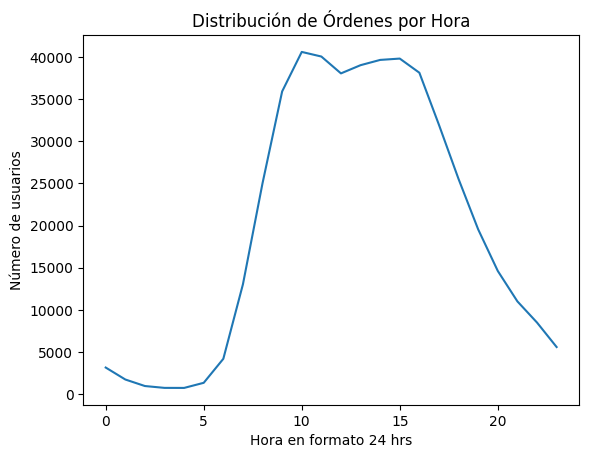

In [37]:
users_order_per_hour = orders.groupby('order_hour_of_day')['user_id'].count()

users_order_per_hour.plot(title='Distribución de Órdenes por Hora',
                          xlabel='Hora en formato 24 hrs',
                          ylabel='Número de usuarios')

plt.show()

Escribe aquí tus conclusiones
- Hay más personas haciendo órdenes entre las 10 am y las 5 pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

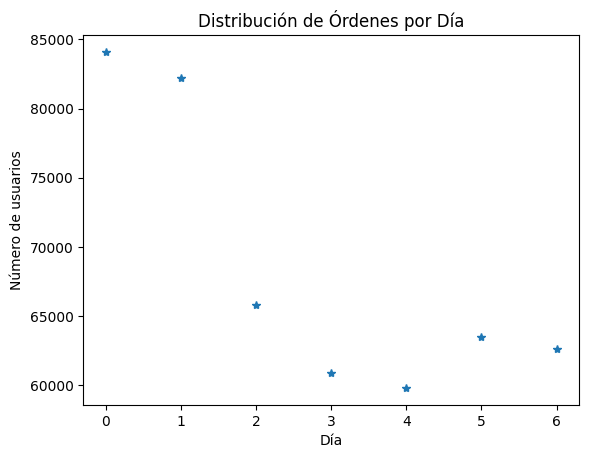

In [38]:
users_order_per_day = orders.groupby('order_dow')['user_id'].count()

users_order_per_day.plot(title='Distribución de Órdenes por Día',
                         style='*',
                         xlabel='Día',
                         ylabel='Número de usuarios'
                         )

plt.show()

Escribe aquí tus conclusiones
- El domingo es el día en el que más personas compran víveres seguido del lunes.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

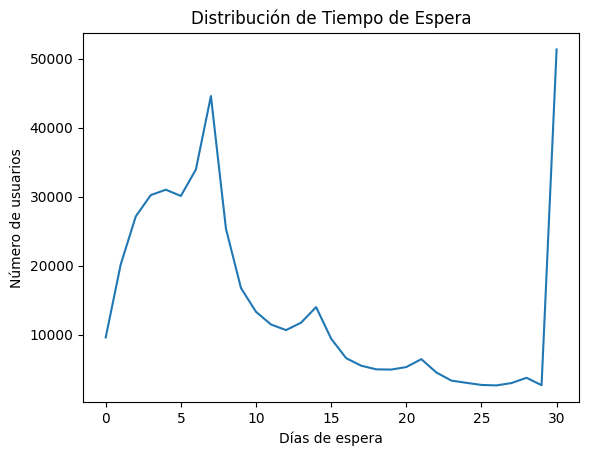

In [39]:
users_per_waiting_period = orders.groupby('days_since_prior_order')['user_id'].count()

users_per_waiting_period.plot(title='Distribución de Tiempo de Espera',
                              xlabel='Días de espera',
                              ylabel='Número de usuarios')

plt.show()

Escribe aquí tus conclusiones
- Los tiempos de esperar pueden variar entre 0 a 30 días. El tiempo que esperan más los usuarios para hacer la siguiente compra es de 30 días.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

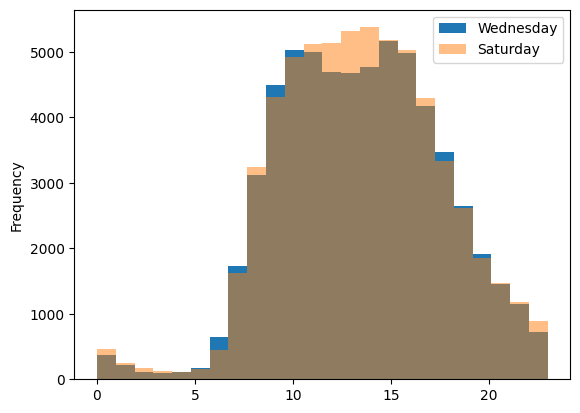

In [40]:
orders_hour_wed = orders[orders['order_dow'] == 3]['order_hour_of_day']
orders_hour_sat = orders[orders['order_dow'] == 6]['order_hour_of_day']

orders_hour_wed.plot(kind='hist', bins=24)
orders_hour_sat.plot(kind='hist', bins=24, alpha=0.5)

plt.legend(['Wednesday', 'Saturday'])
plt.show()

Escribe aquí tus conclusiones
- Las distribuciones para el miércoles y el sábado son muy parecidas. Los sábados hay más órdenes entre las 11 am y las 2pm. 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

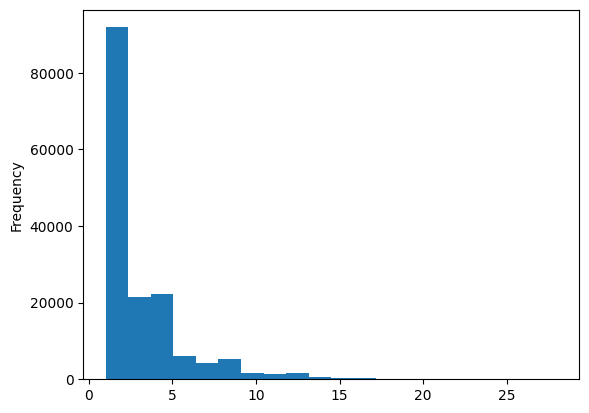

In [41]:
orders_per_user = orders.groupby('user_id')['order_id'].count()

orders_per_user.plot(kind='hist', bins=20)

plt.show()

Escribe aquí tus conclusiones
- La mayoria de los clientes hace un solo pedido.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [42]:
product_id_name = order_products.merge(products, on = 'product_id')
most_popular_products = product_id_name.groupby(['product_id', 'product_name'])['order_id'].count()

print('Los 20 productos más populares: \n\n', most_popular_products.sort_values(ascending=False).head(20))

Los 20 productos más populares: 

 product_id  product_name            
24852       Banana                      66050
13176       Bag of Organic Bananas      53297
21137       Organic Strawberries        37039
21903       Organic Baby Spinach        33971
47209       Organic Hass Avocado        29773
47766       Organic Avocado             24689
47626       Large Lemon                 21495
16797       Strawberries                20018
26209       Limes                       19690
27845       Organic Whole Milk          19600
27966       Organic Raspberries         19197
22935       Organic Yellow Onion        15898
24964       Organic Garlic              15292
45007       Organic Zucchini            14584
39275       Organic Blueberries         13879
49683       Cucumber Kirby              13675
28204       Organic Fuji Apple          12544
5876        Organic Lemon               12232
8277        Apple Honeycrisp Organic    11993
40706       Organic Grape Tomatoes      11781
Name: or

Escribe aquí tus conclusiones
- El plátano es el producto mas comprado por los clientes.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

En promedio, los clientes compran 10 productos.


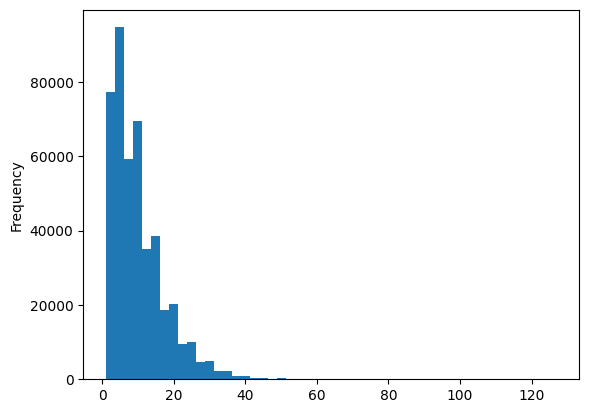

In [43]:
total_products_per_order = order_products.groupby('order_id')['product_id'].count()
avg_products = total_products_per_order.mean()

total_products_per_order.plot(kind='hist', bins=50)

print(f'En promedio, los clientes compran {int(avg_products)} productos.')

Escribe aquí tus conclusiones
- En promedio, los clientes compran 10 productos.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [44]:
reordered_products = order_products[order_products['reordered'] == 1]
reordered_products_with_names = reordered_products.merge(products, on='product_id')

most_popular_reordered_products = reordered_products_with_names.groupby(['product_id', 'product_name'])['order_id'].count()

print('Los 20 principales artículos que vuelven a pedirse con mayor frecuencia: \n\n', most_popular_reordered_products.sort_values(ascending=False).head(20))

Los 20 principales artículos que vuelven a pedirse con mayor frecuencia: 

 product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       O

Escribe aquí tus conclusiones
- El plátano es el artículo que vuelve a pedirse con más frecuencia.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [45]:
total_product_ids = order_products.groupby('product_id')['product_id'].count()

product_ratio = (most_popular_reordered_products / total_product_ids)*100

print(product_ratio.sort_values(ascending=False))

product_id  product_name                                                             
12038       for Women Maximum Absorbency L Underwear                                     100.000000
1809        Slow Kettle Style Santa Fe Chicken Enchilada Soup With White Meat Chicken    100.000000
36122       Spicy Chili Beans                                                            100.000000
3205        Original Pure Chocolate Whippet Cookies                                      100.000000
41901       Moisturizing Lotionized Shave Gel with Vitamin E                             100.000000
                                                                                            ...    
47385       Ground Mustard                                                                 2.083333
37120       Dill Weed                                                                      1.834862
14688       Bamboo Skewers                                                                 1.818182
28741       Or

Escribe aquí tus conclusiones
- Existen productos como el tomate Cabernet que los clientes vuelve a pedir en un 100%.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [46]:
orders_products_users = orders.merge(order_products, on='order_id')

total_products_per_client = orders_products_users.groupby('user_id')['product_id'].count()
#print(total_products_per_client.head(20))

reorder_products_with_username = orders.merge(reordered_products, on='order_id')
reorder_products_per_user = reorder_products_with_username.groupby('user_id')['product_id'].count()
#print(reorder_products_per_user.head(20))

client_ratio = (reorder_products_per_user / total_products_per_client)*100
client_ratio = client_ratio.fillna(0)
print(client_ratio.sort_values(ascending=False))

user_id
137587    100.0
173474    100.0
13918     100.0
62300     100.0
62307     100.0
          ...  
190953      0.0
119371      0.0
63173       0.0
63163       0.0
165726      0.0
Name: product_id, Length: 149626, dtype: float64


Escribe aquí tus conclusiones
- Así como hay clientes que ya habían pedido sus productos antes, hay quienes es la primera vez que los piden. 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [47]:
first_product_added = order_products[order_products['add_to_cart_order'] == 1.00]
first_product_added_with_names = first_product_added.merge(products, on='product_id')

most_popular_first_product_added = first_product_added_with_names.groupby(['product_id', 'product_name'])['order_id'].count()

print('Los 20 principales productos que las personas ponen primero en sus carritos: \n\n', most_popular_first_product_added.sort_values(ascending=False).head(20))

Los 20 principales productos que las personas ponen primero en sus carritos: 

 product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     131

Escribe aquí tus conclusiones
- El platano es el principal producto que la gente pone primero en su carrito.

### Conclusion general del proyecto:
- El proyecto de procesamiento y análisis de datos permitió transformar datos crudos en información estructurada y significativa. A través de la limpieza y preprocesamiento, se eliminaron inconsistencias y valores faltantes, asegurando la calidad de los datos y mejorando la precisión de los resultados. Posteriormente, el análisis reveló tendencias clave, correlaciones y patrones que proporcionaron insights valiosos.